In [1]:
# práce s daty
import pandas as pd
import numpy as np

# vizualizace
import matplotlib.pyplot as plt
import seaborn as sns

# machine learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# modely
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# metriky
from sklearn.metrics import accuracy_score, confusion_matrix


In [7]:
train = pd.read_csv(r"C:\Users\think\OneDrive\Plocha\train (1).csv")
test = pd.read_csv(r"C:\Users\think\OneDrive\Plocha\test.csv")


In [8]:
train.head()
test.info()
test.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [12]:
feature_names = ['Pclass', 'Sex', 'Age', 'Fare', 'Embarked']
x_train = train[feature_names]
y_train = train['Survived']
df_train = pd.DataFrame(x_train, columns=feature_names)
df_train['Survived'] = y_train


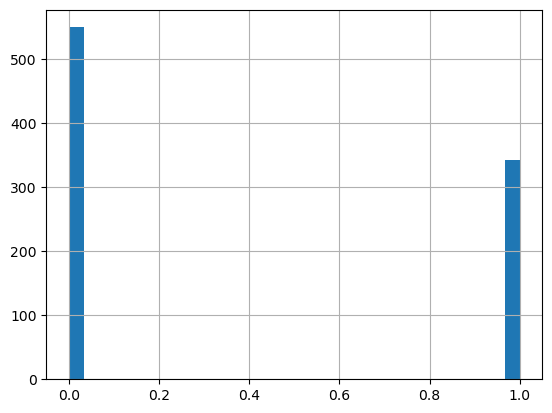

In [13]:
df_train['Survived'].hist(bins=30)
plt.show()

Text(0.5, 1.0, 'Přežili vs. nepřežili')

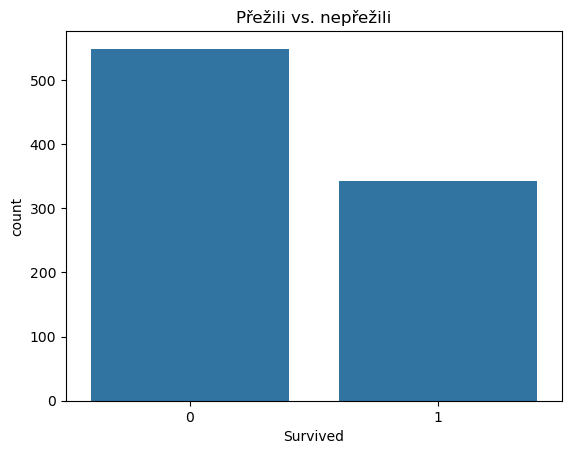

In [14]:
sns.countplot(x="Survived", data=train)
plt.title("Přežili vs. nepřežili")


Text(0.5, 1.0, 'Přežití podle pohlaví')

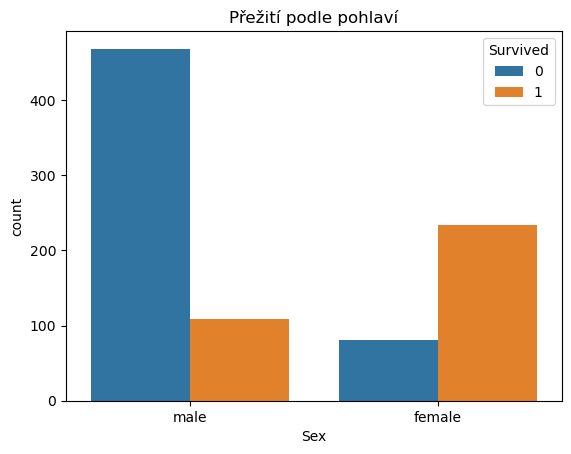

In [15]:
sns.countplot(x="Sex", hue="Survived", data=train)
plt.title("Přežití podle pohlaví")


Text(0.5, 1.0, 'Přežití podle třídy')

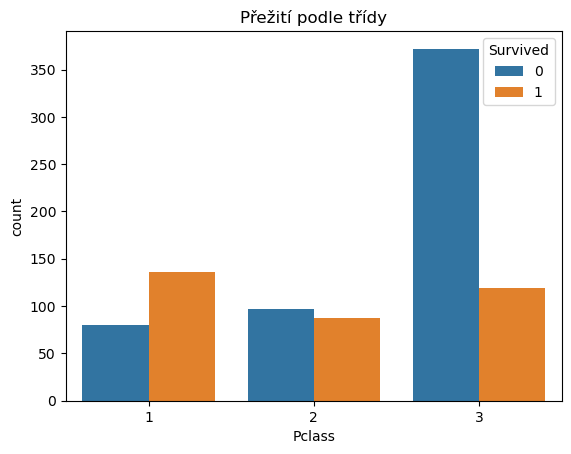

In [16]:
sns.countplot(x="Pclass", hue="Survived", data=train)
plt.title("Přežití podle třídy")


Text(0.5, 1.0, 'Věk vs. přežití')

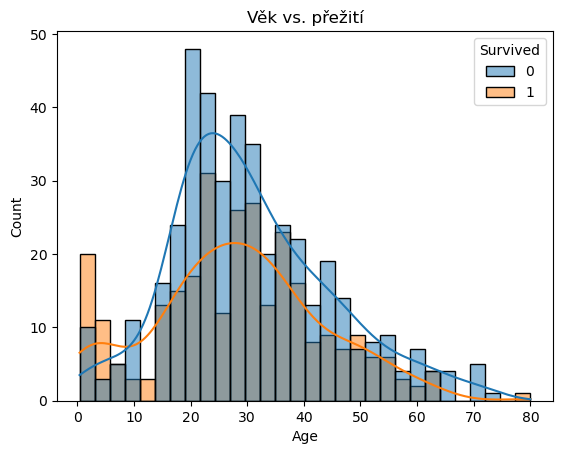

In [17]:
sns.histplot(data=train, x="Age", hue="Survived", bins=30, kde=True)
plt.title("Věk vs. přežití")


Text(0.5, 1.0, 'Boxplot věku podle přežití')

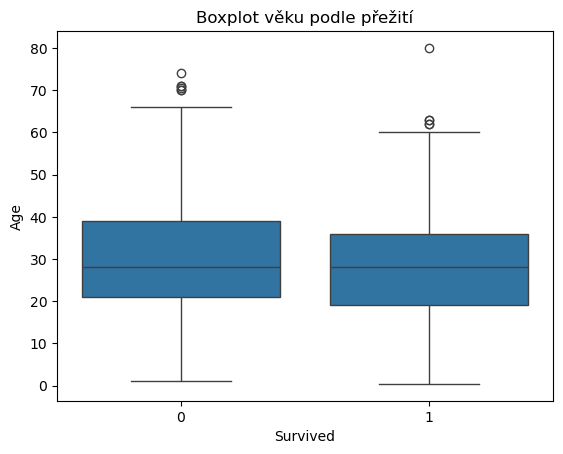

In [18]:
sns.boxplot(x="Survived", y="Age", data=train)
plt.title("Boxplot věku podle přežití")


Text(0.5, 1.0, 'Přežití podle přístavu')

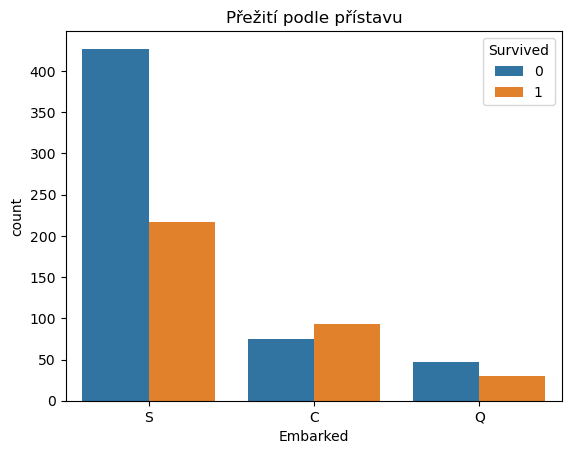

In [19]:
sns.countplot(x="Embarked", hue="Survived", data=train)
plt.title("Přežití podle přístavu")


Text(0.5, 1.0, 'Korelace numerických proměnných')

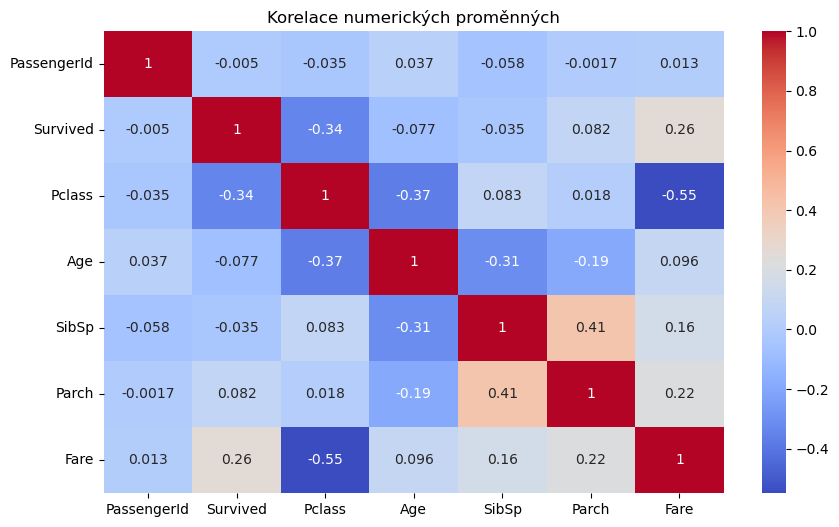

In [20]:
plt.figure(figsize=(10,6))
sns.heatmap(train.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Korelace numerických proměnných")


trenování modelu

In [21]:
featuress = ['Sex', 'Pclass']
X = train[featuress]
y = train['Survived']

In [22]:
X = X.copy()
X['Sex'] = X['Sex'].map({'male': 0, 'female': 1})

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42
)

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_val)
print("Accuracy:", accuracy_score(y_val, y_pred))


Accuracy: 0.7821229050279329


Text(0.5, 1.0, 'Confusion Matrix')

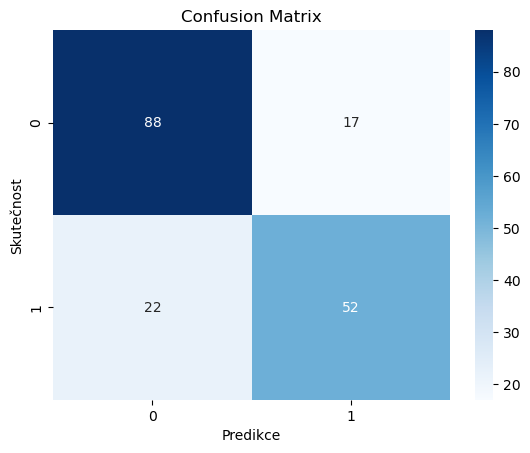

In [24]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_val, y_pred)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predikce")
plt.ylabel("Skutečnost")
plt.title("Confusion Matrix")
